In [1]:
from agent.latent_space.LFSS import PretrainedAEModel
import torch

g:\Code\Python\GitHub\Portfolio-Optimizer\.venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device('cuda')

In [3]:
ae = PretrainedAEModel(device=device)

In [4]:
test = torch.randn([3, 8, 60], dtype=torch.float32)

In [6]:
output = ae.predict(test)

In [9]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
 
def split_sequence(df):
    x = list()
    for i in range(len(df)):
        end_ix = i + 60
        if end_ix > len(df)-1:
            break
        seq_x = df[i:end_ix]
        x.append(seq_x)
        
    return np.array(x)
    
def scaler(array):
    '''scale 3D array with MinMaxScaler'''
    for i in range(array.shape[0]):
        scaler = MinMaxScaler()
        array[i, :, :] = scaler.fit_transform(array[i, :, :])
        return array

In [10]:
a = pd.read_csv('data/Close.csv', index_col=0, parse_dates=True)

In [23]:
df = (np.log(a) - np.log(a.shift(1))).dropna()

In [42]:
test = np.expand_dims(df, 0)[:, 60:120, :]

In [53]:
np.cov(test[0].T).shape

(8, 8)

In [46]:
test[0].shape

(60, 8)

In [49]:
np.expand_dims(np.cov(test[0].T), axis=0).shape

(1, 8, 8)

In [41]:
test_1 = np.transpose(test, [0, 2, 1])

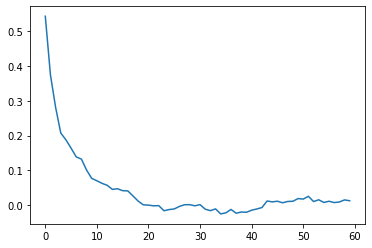

In [37]:
plt.plot(test_1[0][0])

In [28]:
from pykalman import KalmanFilter

In [29]:
kf = KalmanFilter(transition_matrices = [1],
                    observation_matrices = [1],
                    initial_state_mean = 1,
                    initial_state_covariance = 1.5,
                    observation_covariance = 1.5,
                    transition_covariance = 1/30)

In [39]:
for i in range(len(test_1)):
    for j in range(len(test_1[i])):
        a, _ = kf.filter(test_1[i][j])
        test_1[i][j] = np.squeeze(a)

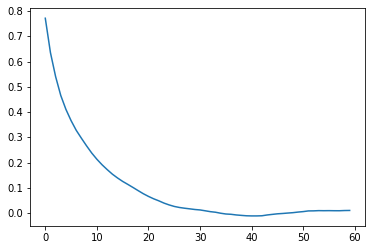

In [40]:
plt.plot(test_1[0][0])

In [54]:
action = np.random.randn(8)

In [55]:
w1 = np.clip(action, a_min=0, a_max=1)

In [56]:
v_test = w1 / (w1.sum())

In [57]:
w_test = w1 / w1.sum()

In [63]:
w1[:3]

array([0.83114228, 1.        , 0.7698576 ])

In [58]:
v_test

array([0.18250024, 0.21957761, 0.16904349, 0.1019997 , 0.        ,
       0.        , 0.21957761, 0.10730136])

In [64]:
w_test

array([0.18250024, 0.21957761, 0.16904349, 0.1019997 , 0.        ,
       0.        , 0.21957761, 0.10730136])